In [1]:
!pip install -qq -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.9/503.9 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import torch
import numpy as np
import random
from utils.preprocess import load_img, PatchifyImage
from utils.diffusion import initialize
from guided_sr import diffusion_guided_sr, bicubic_kernel, SRConv
import matplotlib.pyplot as plt
import cv2
import gc
from huggingface_hub import login

hf_token = # hf token to access sd3.5 model

2025-10-07 21:45:21.486095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759873521.660077      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759873521.712576      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
login(hf_token)

In [ ]:
def set_seed(
        seed: int = 0,
        device: str = "cuda"
):
    """
    Seed the experiment for reproducibility

    :param seed:
        (int) random seed
    :param device:
        (str) device
    :return:
        None
    """
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    random.seed(seed)
    if device == "cuda":
        torch.cuda.set_device(0)
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(0)

In [4]:
pipe, scheduler, prompt_embeds, pooled_prompt_embeds = initialize("stabilityai/stable-diffusion-3.5-medium", "cuda", torch.bfloat16)

config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 24 files:   0%|          | 0/24 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

text_encoder_3/model-00002-of-00002.safe(…):   0%|          | 0.00/4.53G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

text_encoder_3/model-00001-of-00002.safe(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer_3/spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/809 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [5]:
lr_img_path = # lr image to be super-resolved
lr_img = load_img(lr_img_path)

num_inference_steps = [1, 4, 8, 16]
scale = 4
guidance_strength = [0.1, 0.4, 0.7, 0.8, 0.9, 1.0, 1.2]
device = "cuda" 
dtype = torch.bfloat16

# bicubic interpolation
patch_size = max(lr_img.shape[-2:]) - 2*4
kernel = torch.from_numpy(bicubic_kernel(4*scale)).to(dtype=dtype, device=device)
patchify = PatchifyImage(lr_img)
patched_img = patchify.pad_and_split_image(patch_size)
sr_operator = SRConv(patch_size, 3, scale, kernel, device, dtype)
bicubic_img = sr_operator.A_pinv(patched_img)
bicubic_img = patchify.stitch_and_crop(bicubic_img, scale).to(torch.float32)

In [6]:
hr_imgs = []
for step in num_inference_steps:
    set_seed(0)
    hr_img = diffusion_guided_sr(
                    pipe.vae,
                    pipe.transformer,
                    scheduler,
                    lr_img,
                    step,
                    scale,
                    1.0,
                    prompt_embeds,
                    pooled_prompt_embeds,
                    device,
                    dtype,
                )
    hr_imgs.append(hr_img.detach().cpu().to(torch.float32).numpy())
    
    gc.collect()
    torch.cuda.empty_cache()

Scaling Patches: 100%|██████████| 1/1 [02:18<00:00, 138.96s/it]


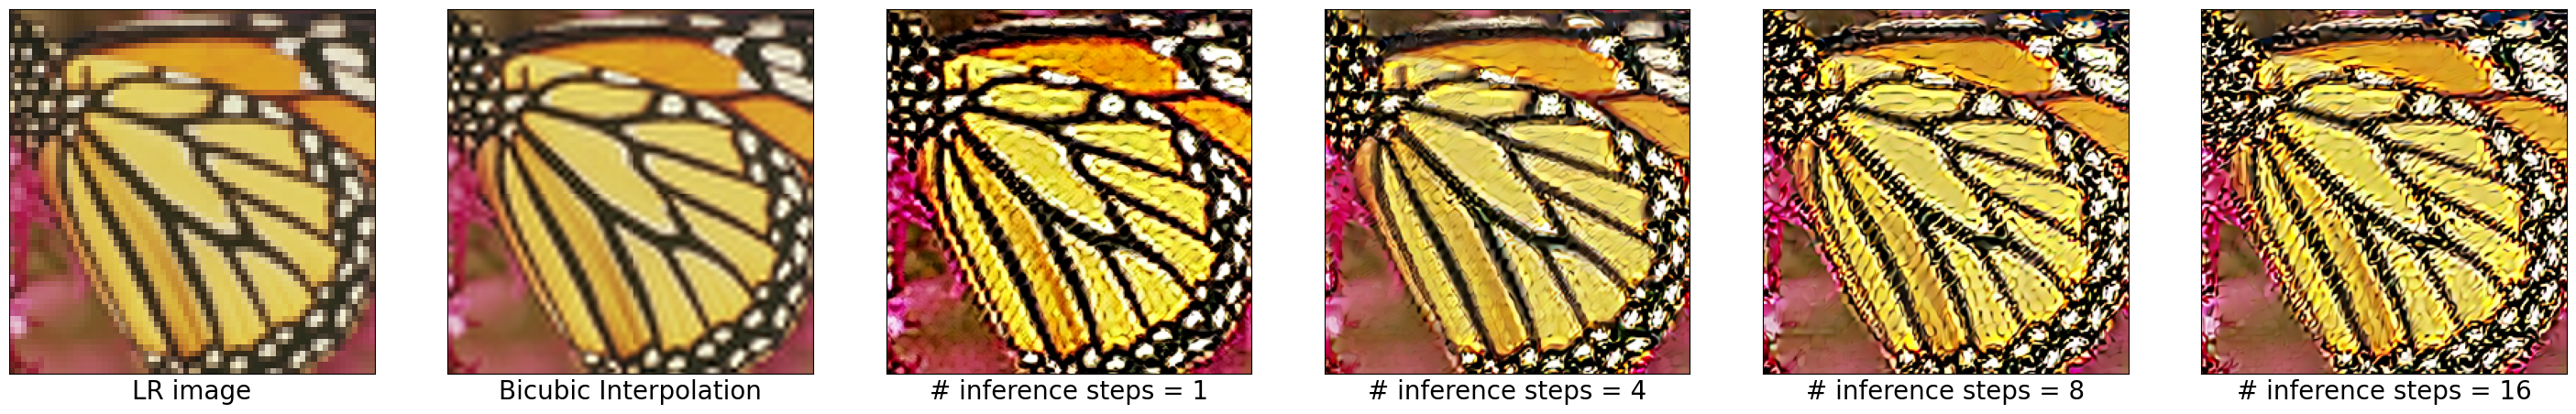

In [7]:
fig, axs = plt.subplots(1,len(num_inference_steps)+2,figsize=(6*(len(num_inference_steps)+2),6))
axs = axs.flatten()

axs[0].imshow(lr_img.permute(1,2,0).cpu().to(torch.float32).numpy())
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel(f"LR image", fontsize=20)

axs[1].imshow(bicubic_img.permute(1,2,0))
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel(f"Bicubic Interpolation", fontsize=20)

for i, n in enumerate(num_inference_steps):
    axs[i+2].imshow(hr_imgs[i].transpose(1,2,0))
    axs[i+2].set_xticks([])
    axs[i+2].set_yticks([])
    axs[i+2].set_xlabel(f"# inference steps = {n}", fontsize=20)
# fig.tight_layout()

plt.savefig("varying_inference_steps.png")

In [8]:
hr_imgs = []
for strength in guidance_strength:
    set_seed(0)
    hr_img = diffusion_guided_sr(
                    pipe.vae,
                    pipe.transformer,
                    scheduler,
                    lr_img,
                    1,
                    scale,
                    strength,
                    prompt_embeds,
                    pooled_prompt_embeds,
                    device,
                    dtype,
                )
    hr_imgs.append(hr_img.detach().cpu().to(torch.float32).numpy())
    
    gc.collect()
    torch.cuda.empty_cache()

Scaling Patches: 100%|██████████| 1/1 [00:12<00:00, 12.14s/it]


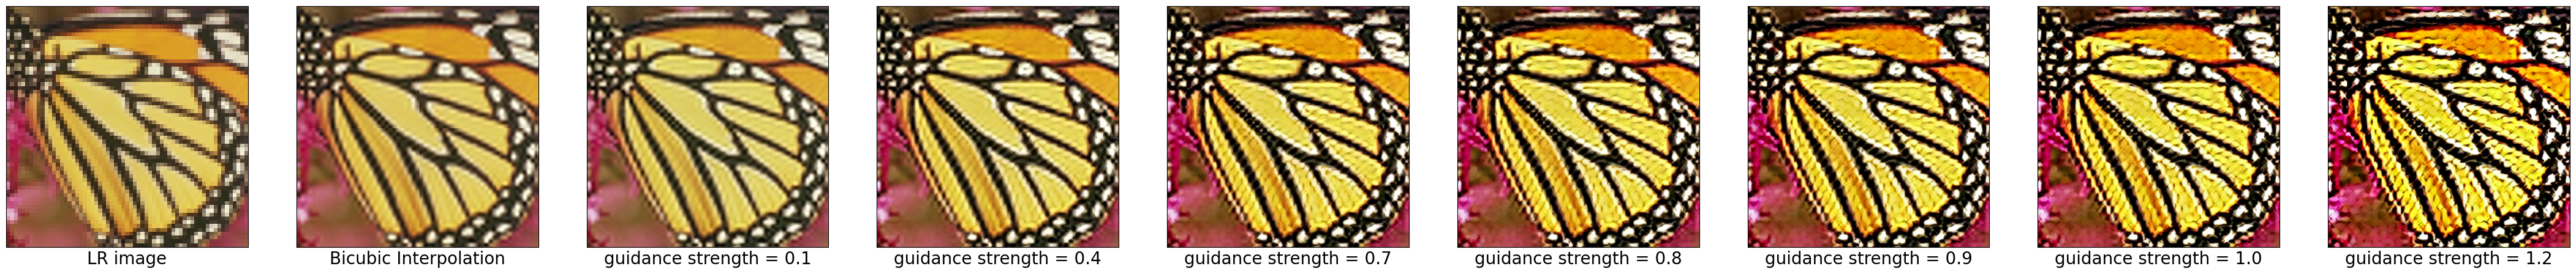

In [9]:
fig, axs = plt.subplots(1,len(guidance_strength)+2,figsize=(6*(len(guidance_strength)+2),6))
axs = axs.flatten()

axs[0].imshow(lr_img.permute(1,2,0).cpu().to(torch.float32).numpy())
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel(f"LR image", fontsize=20)

axs[1].imshow(bicubic_img.permute(1,2,0))
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel(f"Bicubic Interpolation", fontsize=20)

for i, n in enumerate(guidance_strength):
    axs[i+2].imshow(hr_imgs[i].transpose(1,2,0))
    axs[i+2].set_xticks([])
    axs[i+2].set_yticks([])
    axs[i+2].set_xlabel(f"guidance strength = {n}", fontsize=20)
# fig.tight_layout()

plt.savefig("varying_guidance_strength_step_1.png")

In [10]:
hr_imgs = []
for strength in guidance_strength:
    set_seed(0)
    hr_img = diffusion_guided_sr(
                    pipe.vae,
                    pipe.transformer,
                    scheduler,
                    lr_img,
                    8,
                    scale,
                    strength,
                    prompt_embeds,
                    pooled_prompt_embeds,
                    device,
                    dtype,
                )
    hr_imgs.append(hr_img.detach().cpu().to(torch.float32).numpy())
    
    gc.collect()
    torch.cuda.empty_cache()

Scaling Patches: 100%|██████████| 1/1 [01:11<00:00, 71.24s/it]


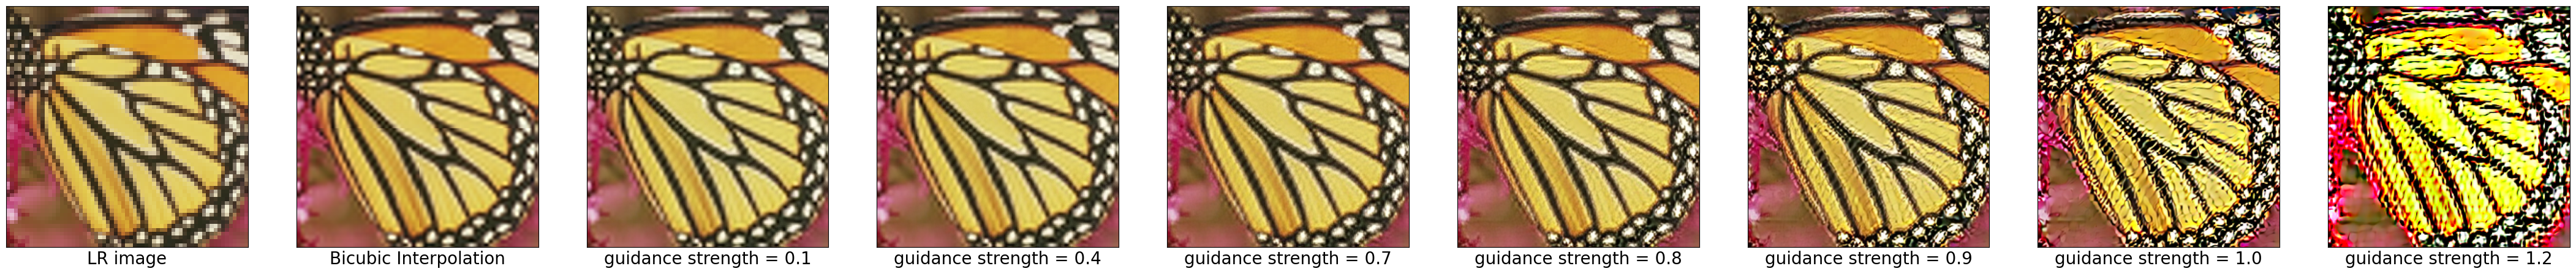

In [11]:
fig, axs = plt.subplots(1,len(guidance_strength)+2,figsize=(6*(len(guidance_strength)+2),6))
axs = axs.flatten()

axs[0].imshow(lr_img.permute(1,2,0).cpu().to(torch.float32).numpy())
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel(f"LR image", fontsize=20)

axs[1].imshow(bicubic_img.permute(1,2,0))
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel(f"Bicubic Interpolation", fontsize=20)

for i, n in enumerate(guidance_strength):
    axs[i+2].imshow(hr_imgs[i].transpose(1,2,0))
    axs[i+2].set_xticks([])
    axs[i+2].set_yticks([])
    axs[i+2].set_xlabel(f"guidance strength = {n}", fontsize=20)
# fig.tight_layout()

plt.savefig("varying_guidance_strength_step_8.png")